In [36]:
import os
os.chdir('C:/Users/raffa/PycharmProjects/PortfolioProject')
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from src.data_exploration.data_exploration import *

In [37]:
df = read_sqlite_table('housedata', './data/processed/rome_house_explored.db')

In [38]:
df = replace_missing_values(df,missing_value='None')

In [39]:
dpp = DataPreprocessor(df)

In [40]:
dpp.train_test(train_size=0.8, seed=42)

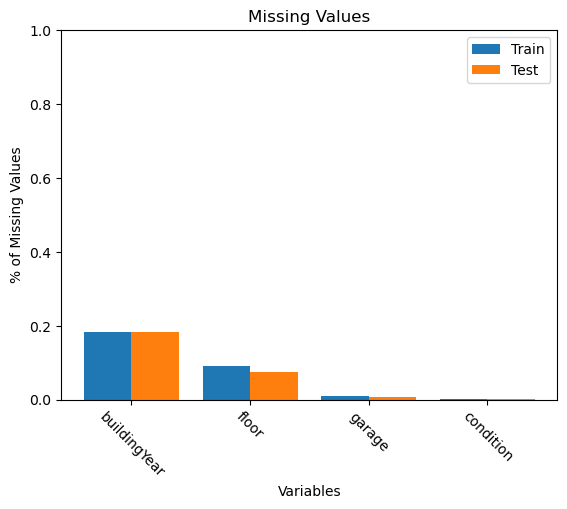

In [41]:
dpp.plot_missing()

In [42]:
train, test, encoding_diz = mean_std_encoding(dpp.train,
                                              dpp.test,
                                              cols_to_encode=['buildingYear','floor'],
                                              target='price',
                                              sigma_proportion=0.1,
                                              min_cat_n=20)

In [43]:
one_hot_cols = ['rooms', 'bathrooms','garage','typology','condition']

for col in one_hot_cols:
    ohe= OneHotEncoder(drop=None)
    train_ohe = ohe.fit_transform(train[[col]])
    test_ohe = ohe.transform(test[[col]])
    
    train[ohe.get_feature_names_out(input_features=None)] = train_ohe.toarray()
    test[ohe.get_feature_names_out(input_features=None)] = test_ohe.toarray()
    train = train.drop(ohe.get_feature_names_out(input_features=None)[-1], axis=1)
    test = test.drop(ohe.get_feature_names_out(input_features=None)[-1], axis=1)

train = train.select_dtypes(exclude=['object'])
test = test.select_dtypes(exclude=['object'])

In [44]:
train = train[['latitude', 'longitude', 'buildingYear', 'surface', 'floor',
       'isNew', 'luxury', 'balcone', 'terrazza', 'cantina', 'piscina',
       'giardino', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'rooms_5',
       'bathrooms_1', 'bathrooms_2', 'bathrooms_3', 'garage_0', 'garage_1',
       'garage_2', 'garage_3', 'garage_4', 'typology_Appartamento',
       'typology_Attico - Mansarda', 'typology_Casa indipendente',
       'typology_Loft', 'typology_Rustico - Casale', 'typology_Villa',
       'condition_Buono / Abitabile', 'condition_Da ristrutturare',
       'condition_Nuovo / In costruzione', 'condition_Ottimo / Ristrutturato', 'price']]
test = test[['latitude', 'longitude', 'buildingYear', 'surface', 'floor',
       'isNew', 'luxury', 'balcone', 'terrazza', 'cantina', 'piscina',
       'giardino', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'rooms_5',
       'bathrooms_1', 'bathrooms_2', 'bathrooms_3', 'garage_0', 'garage_1',
       'garage_2', 'garage_3', 'garage_4', 'typology_Appartamento',
       'typology_Attico - Mansarda', 'typology_Casa indipendente',
       'typology_Loft', 'typology_Rustico - Casale', 'typology_Villa',
       'condition_Buono / Abitabile', 'condition_Da ristrutturare',
       'condition_Nuovo / In costruzione', 'condition_Ottimo / Ristrutturato', 'price']]

<Axes: >

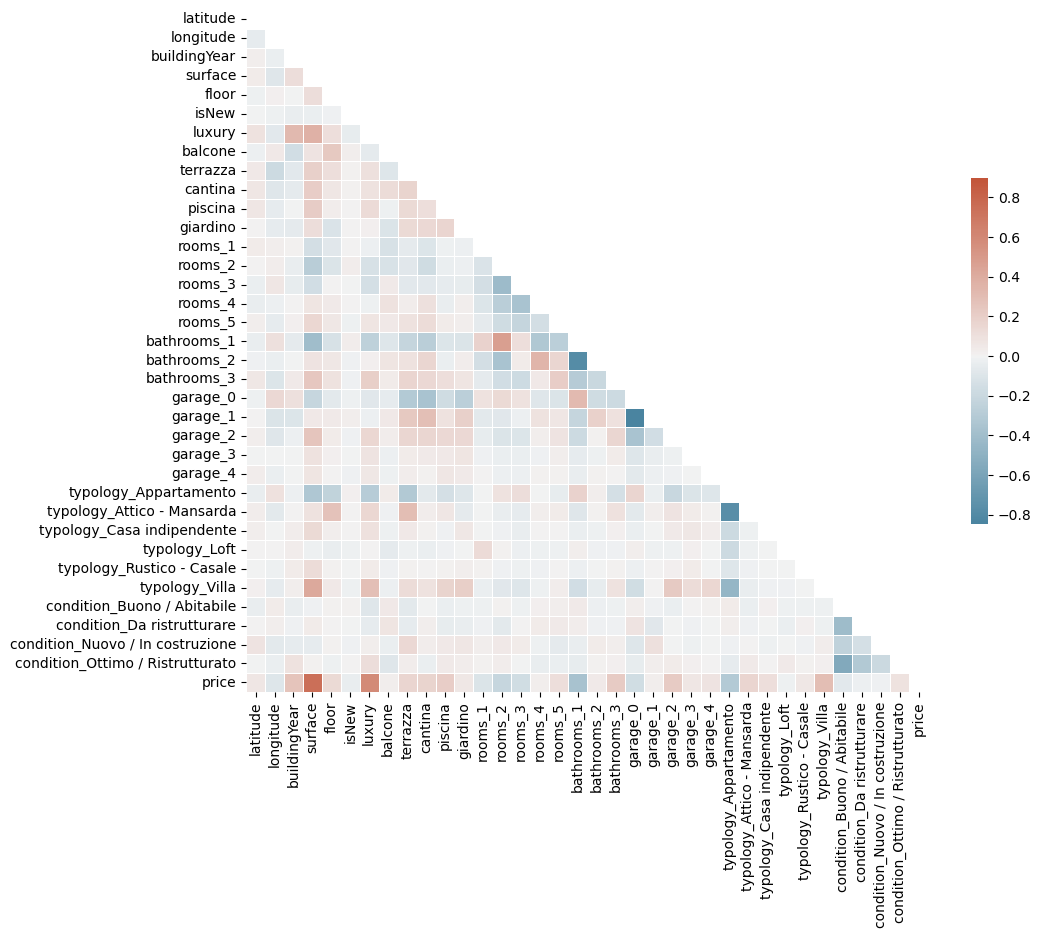

In [46]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
save_to_sql('./data/train_test/train_data.db', train, 'train')
save_to_sql('./data/train_test/test_data.db', test, 'test')